$\newcommand{\abs}[1]{\left\lvert #1 \right\rvert}
\renewcommand{\Set}[1]{{\left\{ #1 \right\}}}
\renewcommand{\set}[1]{\left\{ #1 \right\}}
\newcommand{\mc}[1]{\mathcal{#1}}
\newcommand{\M}[1]{\boldsymbol{#1}}
\renewcommand{\R}[1]{{\mathsf{#1}}}
\newcommand{\RM}[1]{\boldsymbol{\mathsf{#1}}}
\newcommand{\op}[1]{\operatorname{#1}}
\newcommand{\E}{\op{E}}
\newcommand{\d}{\mathrm{\mathstrut d}}$

In [21]:
import itertools
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [53]:
class Node:
    def __init__(self, value, children=None):
        self.value = value
        self.children = [] if children is None else children
        
def generate_random_spreading_tree(n):
    root = Node(1)
    nodes = [root]
    for i in range(2, n+1):
             parent = random.choice(nodes) # select a random parent node
             child = Node(i)               # create a random child 
             parent.children.append(child) # add the child to the parent's children list
             nodes.append(child)           # add the child to the list of Nodes
    return root

#now we need a function to add the nodes and edges to the tree
def add_node_edges(node, tree):
    tree.add_node(node.value)
    edges = []
    if node.children:
        for child in node.children:
            tree.add_edge(node.value, child.value)
            edges.append((node.value, child.value))
            edges.extend(add_node_edges(child, tree))
    return edges
#generate a random spreading tree with 10 nodes        
root = generate_random_spreading_tree(5)
Tree = nx.Graph()
edges = add_node_edges(root, Tree)
print(edges)

[(1, 2), (2, 3), (3, 5), (2, 4)]


In [54]:
print(itertools.permutations(range(3)))

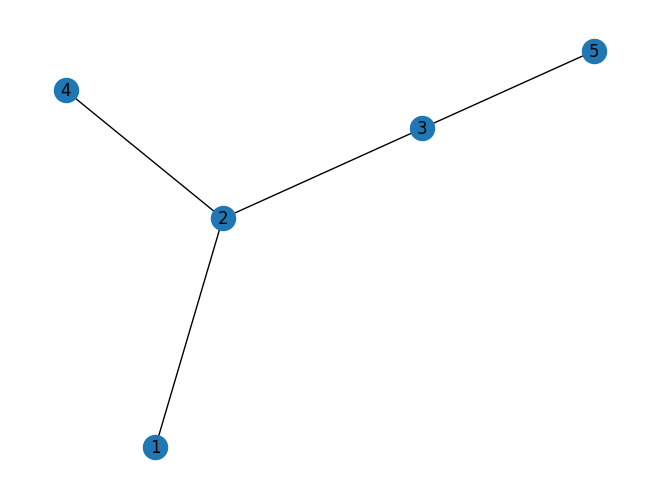

In [55]:
## draw the randomly spreading tree
pos = nx.spring_layout(Tree)
nx.draw(Tree, pos, with_labels=True)
plt.show()


In [48]:
# use Monte Carlo method to sample the edges or permutations by 1000 samples
def permutations_count(n, iterations):
    counts = defaultdict(int)
    for i in range(iterations):
        Tree = nx.Graph()
        root = generate_random_spreading_tree(n)
        edges = add_node_edges(root, Tree)
        #edges = []
        #for node in Tree.nodes:
            #edges.extend(Tree.edges(node))
        counts[tuple(sorted(edges))] += 1
    return counts

In [64]:
counts = permutations_count(n=5, iterations = 10000)
print(counts)

defaultdict(<class 'int'>, {((1, 2), (1, 3), (1, 4), (1, 5)): 399, ((1, 2), (1, 5), (2, 3), (3, 4)): 433, ((1, 2), (1, 3), (2, 5), (3, 4)): 450, ((1, 2), (1, 3), (3, 4), (3, 5)): 413, ((1, 2), (2, 3), (3, 4), (4, 5)): 367, ((1, 2), (2, 3), (3, 4), (3, 5)): 409, ((1, 2), (1, 4), (2, 3), (3, 5)): 390, ((1, 2), (1, 4), (2, 3), (2, 5)): 436, ((1, 2), (2, 3), (2, 4), (2, 5)): 458, ((1, 2), (1, 3), (1, 4), (2, 5)): 402, ((1, 2), (2, 3), (2, 4), (3, 5)): 430, ((1, 2), (2, 3), (2, 4), (4, 5)): 398, ((1, 2), (1, 3), (1, 5), (2, 4)): 434, ((1, 2), (1, 4), (2, 3), (4, 5)): 422, ((1, 2), (1, 3), (1, 4), (3, 5)): 418, ((1, 2), (2, 3), (2, 5), (3, 4)): 413, ((1, 2), (1, 3), (1, 4), (4, 5)): 442, ((1, 2), (1, 3), (2, 4), (3, 5)): 409, ((1, 2), (1, 3), (2, 4), (4, 5)): 415, ((1, 2), (1, 3), (3, 4), (4, 5)): 390, ((1, 2), (1, 5), (2, 3), (2, 4)): 407, ((1, 2), (1, 4), (1, 5), (2, 3)): 416, ((1, 2), (1, 3), (2, 4), (2, 5)): 419, ((1, 2), (1, 3), (1, 5), (3, 4)): 430})


In [65]:
sort_key = len(counts.keys())
print(sort_key)

24


In [66]:
#use sigma to represent each permutation
sigma = defaultdict(int)
sigma_keys = [i for i in range(25)]
sigma = {sigma_keys[i]: item for i, (key, item) in enumerate(counts.items())}
print(sigma)

{0: 399, 1: 433, 2: 450, 3: 413, 4: 367, 5: 409, 6: 390, 7: 436, 8: 458, 9: 402, 10: 430, 11: 398, 12: 434, 13: 422, 14: 418, 15: 413, 16: 442, 17: 409, 18: 415, 19: 390, 20: 407, 21: 416, 22: 419, 23: 430}


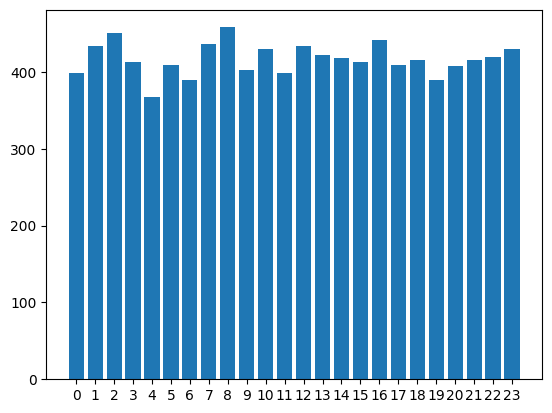

In [67]:
## draw a graph to see the distribution of permutations
data = sigma
x = list(range(len(data)))
y = list(data.values())
labels = list(data.keys())

fig, ax = plt.subplots()
ax.bar(x, y, tick_label=labels)

plt.show()

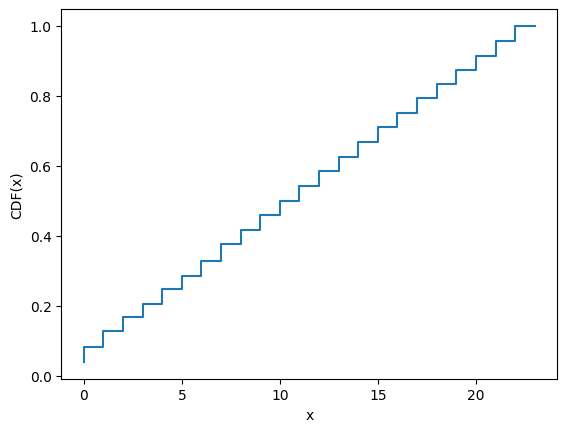

In [69]:
# calculate CDF
cdf = []
total = sum(sigma.values())
cumulative = 0
for i in range(24):
    cumulative += sigma.get(i, 0)
    cdf.append(cumulative / total)

# plot CDF
plt.step(range(24), cdf)
plt.xlabel('x')
plt.ylabel('CDF(x)')
plt.show()